# Implementação do Atividade 2: Perceptron Simples

### Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná
##### Disciplina: Redes Neurais e Deep Learning
##### Estudante: Patrick Motin Cruz
##### Data: 27/10/2025

# 1. Bibliotecas e Funções

Primeiramente, vamos importar as bibliotecas necessárias e implementar as funções básicas do Perceptron:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dados(X, D, titulo):
    plt.figure(figsize=(5,5))
    for i in range(len(X)):
        if D[i] == 0:
            plt.plot(X[i,0], X[i,1], 'ro')
        else:
            plt.plot(X[i,0], X[i,1], 'bo')
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')

def plot_decisao(X, D, W, titulo):
    plt.figure(figsize=(5,5))
    
    # Plot dos pontos
    for i in range(len(X)):
        if D[i] == 0:
            plt.plot(X[i,0], X[i,1], 'ro')
        else:
            plt.plot(X[i,0], X[i,1], 'bo')
    
    # Plot da fronteira de decisão
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(W[0] + W[1]*x1)/W[2]
    plt.plot(x1, x2, 'g-')
    
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis([-0.5, 1.5, -0.5, 1.5])

def perceptron_simples(X, D, eta=0.1, max_epocas=1000):
    n_amostras = X.shape[0]
    n_features = X.shape[1]
    W = np.random.uniform(-0.5, 0.5, size=n_features + 1)
    epocas = 0
    erro = True
    while erro and epocas < max_epocas:
        erro = False
        for i in range(n_amostras):
            x = np.insert(X[i], 0, 1)
            V = np.dot(W, x)
            Y = 1 if V > 0 else 0
            if Y != D[i]:
                W = W + eta * (D[i] - Y) * x
                erro = True
        epocas += 1
    return W, epocas, not erro

def prever_perceptron(W, X):
    n_amostras = X.shape[0]
    Y = np.zeros(n_amostras, dtype=int)
    for i in range(n_amostras):
        x = np.insert(X[i], 0, 1)
        V = np.dot(W, x)
        Y[i] = 1 if V > 0 else 0
    return Y

# 2. Porta Lógica OR

A porta lógica OR retorna 1 se qualquer uma das entradas for 1. Abaixo, vamos:
1. Definir os dados de entrada (X) e saída desejada (D)
2. Visualizar a distribuição inicial dos dados
3. Treinar o perceptron
4. Visualizar a fronteira de decisão aprendida

Porta OR:
Pesos finais: [-0.09647168  0.1933832   0.12229136]
Épocas necessárias: 11
Convergiu? True
Previsões: [0 1 1 1]


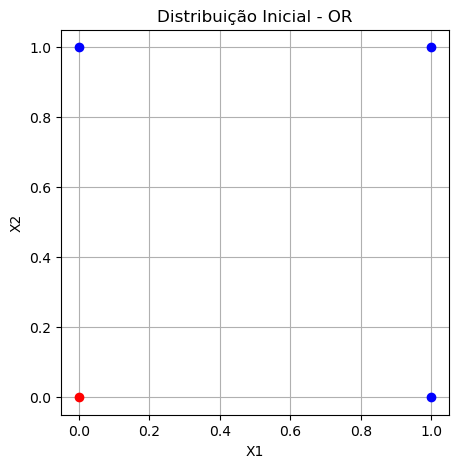

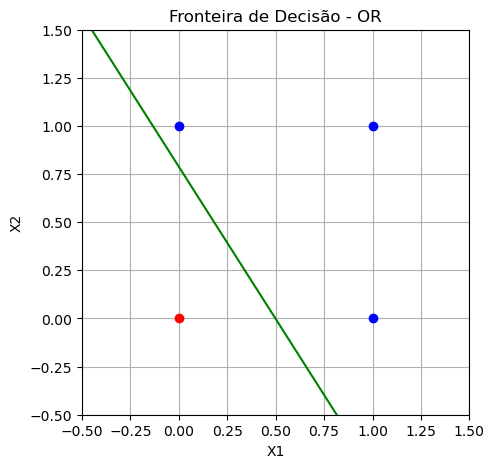

In [10]:
# Definindo os dados
X = np.array([[0,0],[0,1],[1,0],[1,1]])
D_OR = np.array([0,1,1,1])

# Visualização inicial
plot_dados(X, D_OR, 'Distribuição Inicial - OR')

# Treinamento
W, e, c = perceptron_simples(X, D_OR, eta=0.1, max_epocas=100)
print('Porta OR:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_OR, W, 'Fronteira de Decisão - OR')

# 3. Porta Lógica AND

A porta lógica AND retorna 1 apenas se todas as entradas forem 1. Vamos:
1. Definir os dados de entrada (X) e saída desejada (D)
2. Visualizar a distribuição inicial dos dados
3. Treinar o perceptron
4. Visualizar a fronteira de decisão aprendida

Porta AND:
Pesos finais: [-0.26006967  0.2261649   0.10876732]
Épocas necessárias: 9
Convergiu? True
Previsões: [0 0 0 1]


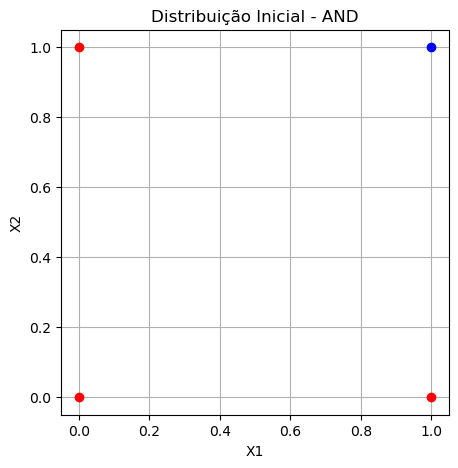

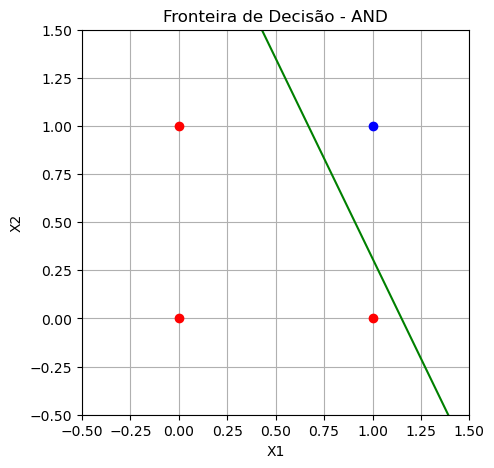

In [11]:
# Definindo os dados
D_AND = np.array([0,0,0,1])

# Visualização inicial
plot_dados(X, D_AND, 'Distribuição Inicial - AND')

# Treinamento
W, e, c = perceptron_simples(X, D_AND, eta=0.1, max_epocas=100)
print('Porta AND:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_AND, W, 'Fronteira de Decisão - AND')

# 4. Porta Lógica XOR

A porta lógica XOR retorna 1 apenas se as entradas forem diferentes (0,1 ou 1,0). Este é um problema não linearmente separável, então o perceptron simples não conseguirá aprender corretamente. Vamos demonstrar isso:
1. Definir os dados de entrada (X) e saída desejada (D)
2. Visualizar a distribuição inicial dos dados
3. Tentar treinar o perceptron
4. Visualizar a tentativa de fronteira de decisão (que não funcionará corretamente)

Porta XOR:
Pesos finais: [ 0.08148503 -0.15736091 -0.03883975]
Épocas necessárias: 100
Convergiu? False
Previsões: [1 1 0 0]


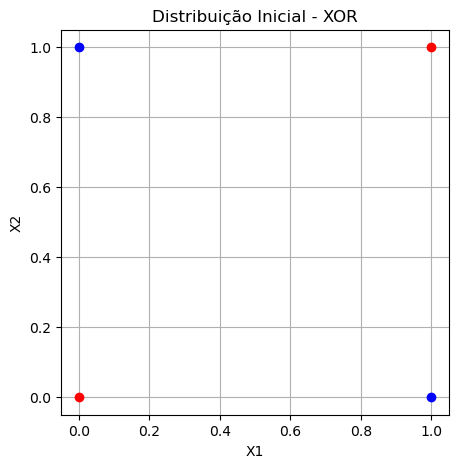

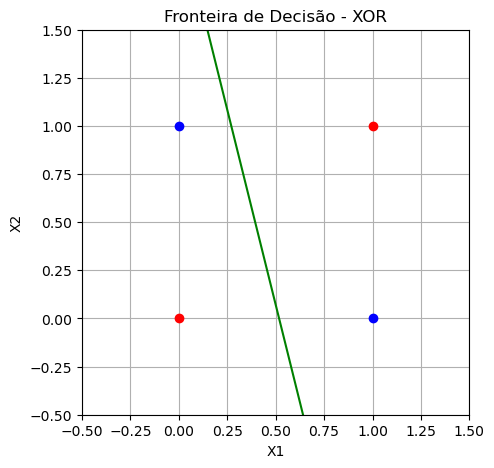

In [12]:
# Definindo os dados
D_XOR = np.array([0,1,1,0])

# Visualização inicial
plot_dados(X, D_XOR, 'Distribuição Inicial - XOR')

# Treinamento
W, e, c = perceptron_simples(X, D_XOR, eta=0.1, max_epocas=100)
print('Porta XOR:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_XOR, W, 'Fronteira de Decisão - XOR')

### Observação: O perceptron simples NÃO consegue aprender a função XOR, porque ela NÃO é linearmente separável.)